<center><div style="direction:rtl;font-family:B Lotus, B Nazanin, Tahoma">به نام خدا</div></center>
<img src="./logo.png" alt="class.vision" style="width: 200px;"/>
<h1><center><div style="direction:rtl;font-family:B Lotus, B Nazanin, Tahoma">مقدمات شبکه‌های بازگشتی و SimpleRNN</div></center></h1>

In [1]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


# <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">ایجاد مجموعه داده</div>

<div style="direction:rtl;text-align:right;font-family:Tahoma">
ایجاد یک سری سینوسی برای 1500 گام زمانی با نویز تصادفی.</div>

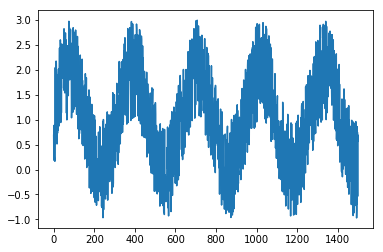

In [2]:
t = np.arange(0,1500)
x = np.sin(0.02*t)+ np.random.rand(1500) * 2
plt.plot(x)
plt.show()

# <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">جدا کردن داده آموزشی و آزمون</div>

<div style="direction:rtl;text-align:right;font-family:Tahoma">
1000 مقدار اول برای آموزش و 500 تای آخر برای تست در نظر گرفته شده است.</div>

In [3]:
train,test = x[0:1000], x[1000:]

# <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">آماده سازی داده و ایجاد ورودی و label</div>

<div style="direction:rtl;text-align:right;font-family:Tahoma">
در شبکه های RNN برای ورودی Step در نظر میگیریم.
برای شبکه های RNN مهمه که ورودی به شکل دنباله ای از داده باشد. در اینجا step طول دنباله ی ورودی را تعیین میکند. برای مثال اگر x را به عنوان داده خام داشته باشیم:
<br>
</div>

    x = [1,2,3,4,5,6,7,8,9,10]
    
    for step=1, x input  and its y prediction becomes:
    
    x  y
    1  2
    2  3
    3  4
    4  5
    ..
    9  10
    
    for step=3, x and y contain:
    
    x         y
    1,2,3     4
    2,3,4     5
    3,4,5     6
    4,5,6     7
    ...
    7,8,9     10


In [4]:
step = 10

# convert into dataset data and label
def convertToDataset(data, step):
    #data = np.append(data,np.repeat(data[-1,],step))
    X, Y =[], []
    for i in range(len(data)-step):
        d=i+step  
        X.append(data[i:d,])
        Y.append(data[d,])
    return np.array(X), np.array(Y)

trainX,trainY =convertToDataset(train,step)
testX,testY =convertToDataset(test,step)

In [5]:
print(trainX.shape)
print(testX.shape)

(990, 10)
(490, 10)


# <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">تغییر ابعاد داده برای ورودی دادن به شبکه</div>

<div style="direction:rtl;text-align:right;font-family:Tahoma">
ورودی یک شبکه RNN در Keras به صورت زیر است:
</div>

    (NumberOfSequences, TimeSteps, ElementsPerStep)

In [6]:
trainX = np.reshape(trainX, (trainX.shape[0],  trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0],testX.shape[1], 1))

In [7]:
print(trainX.shape)
print(testX.shape)

(990, 10, 1)
(490, 10, 1)


# <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">معماری شبکه و compile آن</div>


In [8]:
model = Sequential()
model.add(SimpleRNN(units=64, activation="tanh"))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='rmsprop')

<div style="direction:rtl;text-align:right;font-family:Tahoma">
به نظر شما model.summary() را می‌توانیم صدا بزنیم؟ چرا؟
<br>
model.input
چه چیزی بر می‌گرداند!
</div>

# <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">آموزش مدل</div>


In [9]:
history = model.fit(trainX,trainY, epochs=100, batch_size=16, verbose=2)

Epoch 1/100
 - 7s - loss: 0.7639
Epoch 2/100
 - 1s - loss: 0.4325
Epoch 3/100
 - 1s - loss: 0.4140
Epoch 4/100
 - 1s - loss: 0.4124
Epoch 5/100
 - 1s - loss: 0.4048
Epoch 6/100
 - 1s - loss: 0.4024
Epoch 7/100
 - 1s - loss: 0.3989
Epoch 8/100
 - 1s - loss: 0.3947
Epoch 9/100
 - 1s - loss: 0.3917
Epoch 10/100
 - 1s - loss: 0.3912
Epoch 11/100
 - 1s - loss: 0.3889
Epoch 12/100
 - 1s - loss: 0.3908
Epoch 13/100
 - 1s - loss: 0.3847
Epoch 14/100
 - 1s - loss: 0.3862
Epoch 15/100
 - 1s - loss: 0.3829
Epoch 16/100
 - 1s - loss: 0.3755
Epoch 17/100
 - 1s - loss: 0.3829
Epoch 18/100
 - 1s - loss: 0.3742
Epoch 19/100
 - 1s - loss: 0.3674
Epoch 20/100
 - 1s - loss: 0.3691
Epoch 21/100
 - 1s - loss: 0.3724
Epoch 22/100
 - 1s - loss: 0.3703
Epoch 23/100
 - 1s - loss: 0.3643
Epoch 24/100
 - 1s - loss: 0.3625
Epoch 25/100
 - 1s - loss: 0.3631
Epoch 26/100
 - 1s - loss: 0.3631
Epoch 27/100
 - 1s - loss: 0.3628
Epoch 28/100
 - 1s - loss: 0.3552
Epoch 29/100
 - 1s - loss: 0.3560
Epoch 30/100
 - 1s - lo

<div style="direction:rtl;text-align:right;font-family:Tahoma">
حالا model.summary() را می‌توانیم صدا بزنیم؟ چرا؟
<br>
    الان
model.input
چه چیزی بر می‌گرداند؟
</div>

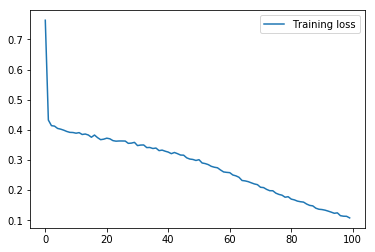

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

loss = history.history['loss']
plt.plot(loss, label='Training loss')
plt.legend()

plt.show()

# <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma"> ارزیابی مدل</div>

In [11]:
trainScore = model.evaluate(trainX, trainY, verbose=0)
print(trainScore)

0.08597392486502425


# <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma"> رسم سری اصلی و پیش بینی برای داده های آموزشی و تست </div>


In [12]:
trainPredict = model.predict(trainX)
testPredict= model.predict(testX)
predicted=np.concatenate((trainPredict,testPredict),axis=0)

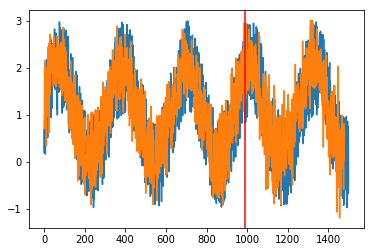

In [13]:
plt.plot(x)
plt.plot(predicted)
plt.axvline(len(trainX), c="r")
plt.show()

# <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma"> ورودی مدل با طول متفاوت </div>


In [15]:
testX,testY =convertToDataset(test,50)

In [19]:
testX = np.reshape(testX, (testX.shape[0],testX.shape[1], 1))
testX.shape

(450, 50, 1)

<div style="direction:rtl;text-align:right;font-family:Tahoma">
همان طور که مشخص است کد با خطا مواجه می‌شود! چرا؟! </div>


In [22]:
testPredict= model.predict(testX)


ValueError: Error when checking input: expected sequential_1_input to have shape (10, 1) but got array with shape (50, 1)

In [23]:
model.input

<tf.Tensor 'sequential_1_input:0' shape=(?, 10, 1) dtype=float32>

<div class="alert alert-block alert-info">
<div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma"> دوره پیشرفته یادگیری عمیق<br>علیرضا اخوان پور<br>  آبان و آذر 1399<br>
</div>
<a href="http://class.vision">Class.Vision</a> - <a href="http://AkhavanPour.ir">AkhavanPour.ir</a> - <a href="https://github.com/Alireza-Akhavan/">GitHub</a>

</div>